# Import Dataset

In [2]:
import pandas as pd
import re

hn = pd.read_csv("04_Data_Cleaning/04_2_Advanced_data_cleaning/hacker_news.csv")

titles = hn["title"]

# 1 Introduction

1. Create a case insensitive regex pattern that matches all case variations of the letters SQL.

1. Use that regex pattern and the ignorecase flag to count the number of mentions of SQL in titles. Assign the result to `sql_counts`.

In [3]:
pattern = r"sql" 
sql_counts = titles.str.contains(pattern,flags=re.I).sum()

# 2 Capture Groups

We define a **capture group** by wrapping the part of our pattern we want to capture in parentheses. If we want to capture the whole pattern, we just wrap the whole pattern in a pair of parentheses:

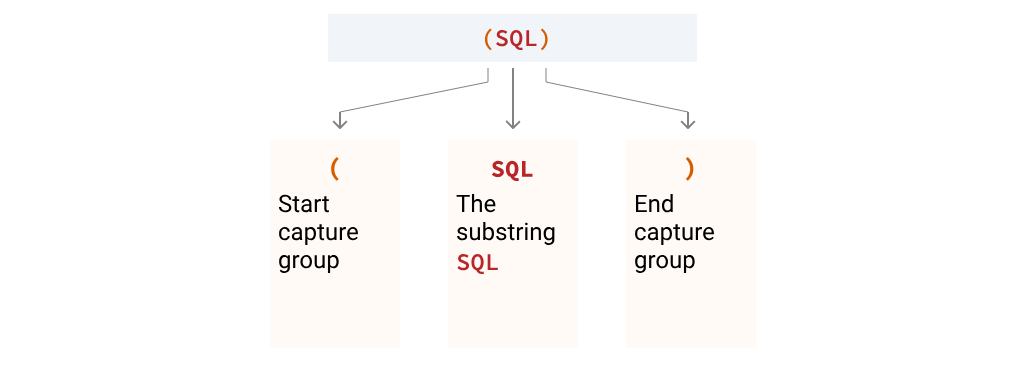

Recall that we specify expand=False with the `Series.str.extract()` method to return a series. Lastly, we use the `Series.value_counts()` method to create a frequency table of those capitalizations:



## Example - Capture SQL groups

Let's look at how we can use a capture group to create a frequency table of the different **capitalizations** of SQL in our dataset. We start by wrapping our regex pattern in parentheses.

Next, we use `Series.str.extract()` to extract the different capitalizations:

In [ ]:
pattern = r"(SQL)"
sql_capitalizations = titles.str.extract(pattern, flags=re.I, expand=False)
sql_capitalizations_freq = sql_capitalizations.value_counts() #generate frequency table os SQL
print(sql_capitalizations_freq)

title
SQL    101
Sql      4
sql      3
Name: count, dtype: int64


We can extend this analysis by looking at titles that have letters immediately before the "SQL," which is a convention often used to denote different variations or flavors of SQL:

In [4]:
pattern = r"(\w+SQL)"
sql_flavors = titles.str.extract(pattern, flags=re.I, expand=False)
sql_flavors_freq = sql_flavors.value_counts()
print(sql_flavors_freq)

title
PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
CloudSQL       1
Name: count, dtype: int64


Notice how there is some duplication due to varied capitalization in this frequency table:

```
NoSQL and nosql
MySQL and mysql

```

## Instructions

We have created a new dataframe, hn_sql, including only rows that mention a SQL flavor.

1. Create a new column called `flavor` in the `hn_sql` dataframe, containing extracted mentions of SQL flavors, defined as:

    - Any time 'SQL' is preceded by one or more word characters.
    
    - Ignoring all case variation.

1. Use the `Series.str.lower()` method to clean the values in the flavor column by converting them to lowercase. Assign the values back to the column in `hn_sql`.

1. Use the `DataFrame.pivot_table()` method to create a pivot table, `sql_pivot`.
    - The index of the pivot table should be the `flavor` column.
    - The values of the pivot table should be the mean of the `num_comments` column, aggregated by SQL flavor.

In [ ]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()

#create flavor column (type of SQL)
#str.extract only works with capture groups (SQL)
hn_sql['flavor'] = hn_sql['title'].str.extract(r"(\w+SQL)", flags=re.I,expand=True)

hn_sql['flavor'] = hn_sql['flavor'].str.lower()
sql_pivot = pd.pivot_table(hn_sql,values='num_comments',index='flavor',aggfunc='mean')

# 3 Using Capture Groups to Extract Data

Capture groups can also be useful to extract specific data from within our expression.

```
Developing a computational pipeline using the asyncio module in Python 3
Python 3 on Google App Engine flexible environment now in beta
Python 3.6 proposal, PEP 525: Asynchronous Generators
How async/await works in Python 3.5.0
Ubuntu Drops Python 2.7 from the Default Install in 16.04
Show HN: First Release of Transcrypt Python3.5 to JavaScript Compiler

```

All of these examples have a number after the word "**Python**," which indicates a version number. Sometimes a space precedes the number, sometimes it doesn't. We can use the following regular expression to match these cases:

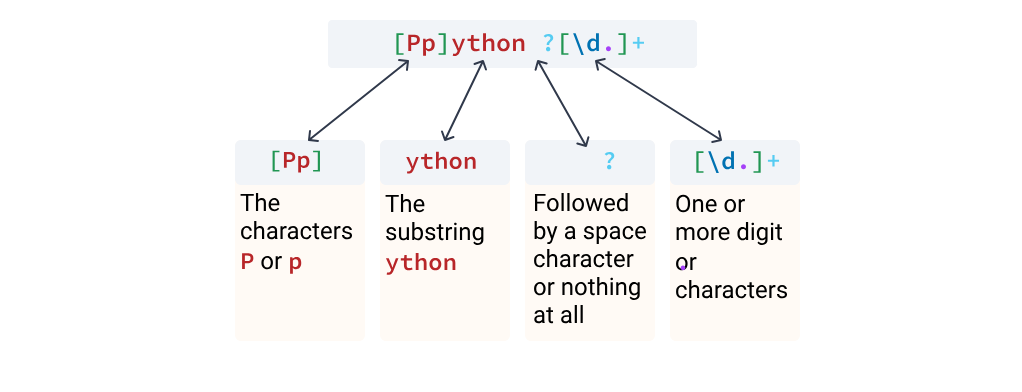

We'll use a capture group to capture the version number after the word "**Python**," and then build a frequency table of the different versions.

In [ ]:
pattern = r"[Pp]ython ([\d.]+)" #Extract only version in python

py_versions = titles.str.extract(pattern,expand=False)

#convert series to dict
py_versions_freq = dict(py_versions.value_counts())

# 4 Counting Mentions of the 'C' Language

We can start with a simple regular expression and then iterate as we find and exclude incorrect matches. Let's start with a simple regex that matches the letter "**c**" with word boundary anchors on either side

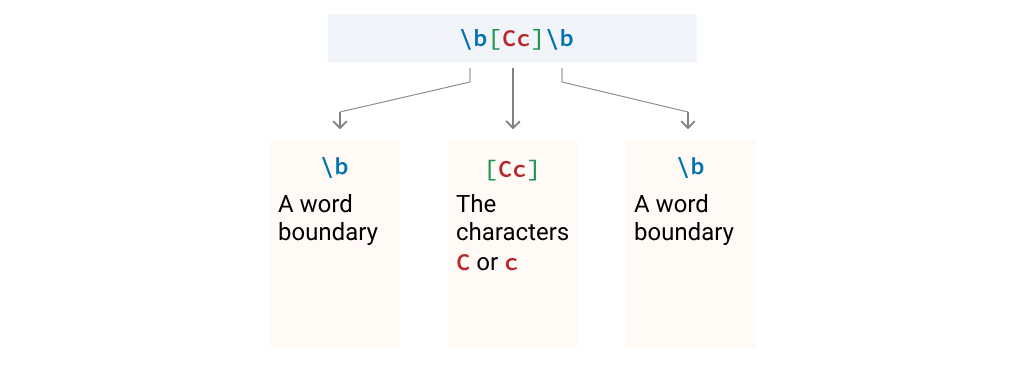

We'll re-use the `first_10_matches()` function that we defined in the previous lesson to see the results we get from this regular expression:

In [ ]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

first_10_matches(r"\b[Cc]\b")

Immediately, our results are reasonably relevant. However, we can quickly identify a few match types we want to prevent:

    * Mentions of C++, a distinct language from C.

    * Cases where the letter C is followed by a period, like in the substring C.E.O.
    
Let's use a negative set to prevent matches for the `+` character and the `.` character.

## Instructions

1. Add a negative set to the end of the regular expression that excludes:
    * The period character `.`
    * The plus character `+` .

1. Use the `first_10_matches()` function to return the matches for the regular expression you built, assigning the result to first_ten.

In [ ]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10
    
pattern = r"\b[Cc]\b[^.+]"

first_ten = first_10_matches(pattern)
print(first_ten)

# 5 Using Lookarounds to Control Matches Based on Surrounding Text

Lookarounds let us define a character or sequence of characters that either must or must not come **before** or **after** our regex match. There are four types of lookarounds:

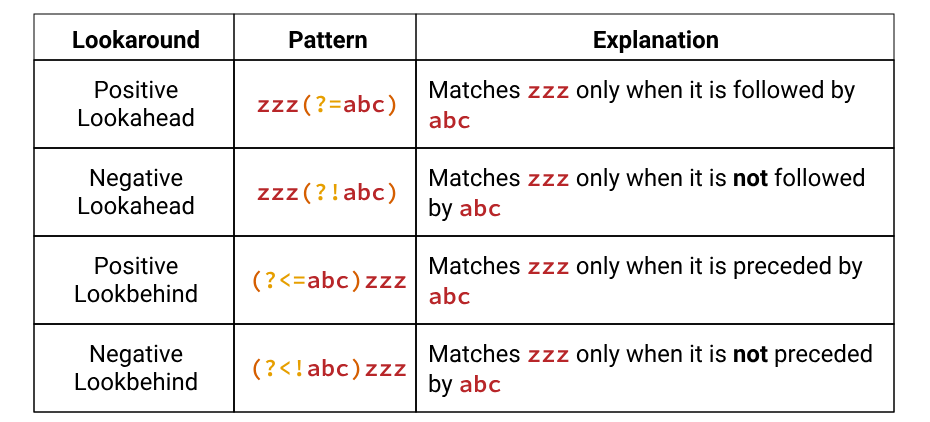

These tips can help you remember the syntax for lookarounds:

* Inside the parentheses, the first character of a lookaround is always `?`.

* If the lookaround is a **lookbehind**, the next character will be `<`, which you can think of as an arrow head pointing behind the match.

* The next character indicates whether the lookaround is positive (`=`) or negative (`!`).

While building regular expressions, you can also use the OR operator `|`. The `|` operator allows the expression to match either the condition preceding it or the one following it. For example, the expression `((?![+.])|\.$)` matches either instances that are not followed by `.` or `+` or instances where the match is at the **end** of the sentence.

## Example

In [ ]:
test_cases = ['Red_Green_Blue',
              'Yellow_Green_Red',
              'Red_Green_Red',
              'Yellow_Green_Blue',
              'Green']

We'll also create a function that will loop over our test cases and tell us whether our pattern matches. We'll use the `re` module rather than pandas since it tells us the exact text that matches, which will help us understand how the lookaround is working:

In [ ]:
def run_test_cases(pattern):
    for tc in test_cases:
        result = re.search(pattern, tc)
        print(result or "NO MATCH")

In each instance, we'll aim to match the substring `Green` depending on the characters that precede or follow it. Let's start by using a **positive lookahead** to include instances where the match is followed by the substring `_Blue`.

In [ ]:
run_test_cases(r"Green(?=_Blue)")

Let's look at a **negative lookahead** to include instances where the match is not followed by the substring `_Red`:

In [ ]:
run_test_cases(r"Green(?!_Red)")

Next we'll use a **positive lookbehind** to include instances where the match is preceded by the substring `Red_`

In [ ]:
run_test_cases(r"(?<=Red_)Green")

 finally, using a **negative lookbehind** to include instances where the match isn't preceded by the substring `Yellow_`:

In [ ]:
run_test_cases(r"(?<!Yellow_)Green")

The contents of a lookaround can include any other regular expression component. For instance, here is an example where we match only cases that are followed by **exactly five characters**:

In [ ]:
run_test_cases(r"Green(?=.{5})")

## Instructions

In this exercise, we're going to use lookarounds to refine the regular expression we built on the last screen to capture mentions of the "C" programming language.

Let's now use lookarounds to exclude the matches we don't want. We want to:

* Keep excluding matches that are followed by `.` or `+`, but still match cases where "C" falls at the end of the sentence. -> `pattern = r"\b[Cc]\b[^.+]"`

* Exclude matches that have the word 'Series' immediately preceding them.

From the match above:

* Exclude instances where it is followed by a `.` or `+` character, without removing instances where the match occurs at the end of the sentence. The end anchor `(\.$)` will help to preserve occurrences of c or C at the end of the sentence.

* Exclude instances where the word '`Series`' immediately precedes the match.

In [ ]:
#put Series before
#C is not followed by period (.) or plus sign (+)
pattern = r"(?<!Series\s)\b[Cc]\b(?![\.$]|[\+])"

c_mentions = titles.str.contains(pattern).sum()
print(c_mentions)

# 6 BackReferences: Using Capture Groups in a RegEx Pattern

Let's say we wanted to identify strings that had words with double letters, like the "`ee`" in "`feed`." Because we don't know ahead of time what letters might be repeated, we need a way to specify a capture group and then to repeat it. We can do this with **backreferences**.

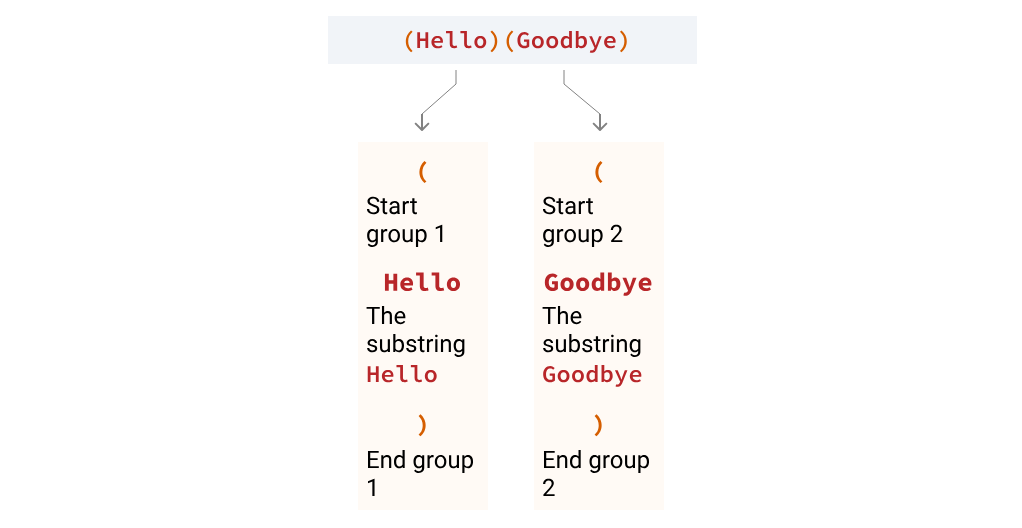

Within a regular expression, we can use a **backslash** followed by that integer to refer to the group:

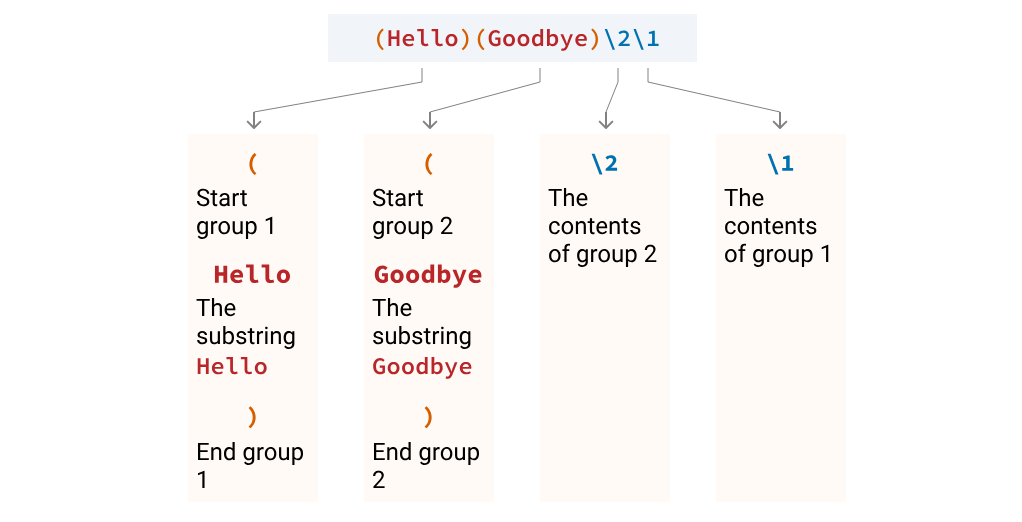

The regular expression above will match the text `HelloGoodbyeGoodbyeHello`. Let's look at how we could write a regex to capture instances of the same **two word characters** in a row:

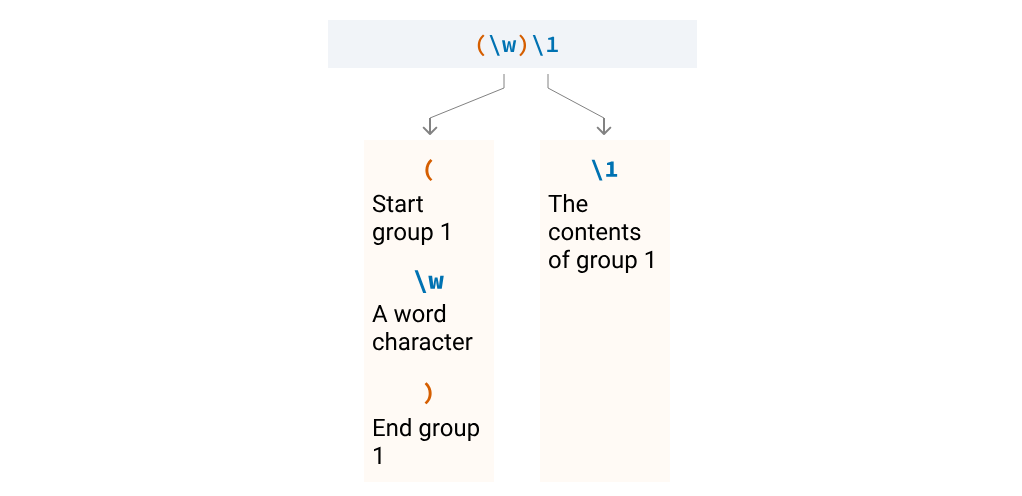

Let's see this in action using Python:

In [ ]:
test_cases = [
              "I'm going to read a book.",
              "Green is my favorite color.",
              "My name is Aaron.",
              "No doubles here.",
              "I have a pet eel."
             ]

for tc in test_cases:
    print(re.search(r"(\w)\1", tc))

Notice that there was no match for the word `Aaron`, despite it containing a double "a." This is because the uppercase and lowercase "a" are two different characters, so the backreference does not match.

We can easily achieve the same thing using pandas:

In [ ]:
test_cases = pd.Series(test_cases)
print(test_cases.str.contains(r"(\w)\1"))

## Instructions

Let's use this technique to identify story titles that have repeated words.

1. Write a regular expression to match cases of repeated words:

* We'll define a word as a series of one or more word characters preceded and followed by a boundary anchor.

* We'll define repeated words as the same word repeated twice, separated by a single whitespace character.

1. Select only the items in titles that match the regular expression. Assign the result to repeated_words.

In [4]:
#word as a series of one or more word characters = w+
#preceded and followed by a boundary anchor. \b \b
#separated by a single whitespace character. = \s

#Capture the word at the start with \b(\w+)
#Match the whitespace with \s
#Capture the repeated word at the end with \1\b

pattern = r"\b(\w+)\s\b\1\b"

repeated_words = titles[titles.str.contains(pattern)]


/tmp/ipykernel_658/1169613924.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  repeated_words = titles[titles.str.contains(pattern)]


# 7 Substituting Regular Expression Matches

When we learned to work with basic string methods, we used the `str.replace()` method to replace simple substrings. We can achieve the same with regular expressions using the `re.sub()` function. The basic syntax for `re.sub()` is:

`re.sub(pattern, repl, string, flags=0)`

The `repl` parameter is the text that you would like to substitute for the match. Let's look at a simple example where we replace **all capital letters** in a string with dashes:

In [5]:
string = "aBcDEfGHIj"

print(re.sub(r"[A-Z]", "-", string))

a-c--f---j


When working in pandas, we can use the `Series.str.replace()` method, which uses similar syntax:

`Series.str.replace(pat, repl, flags=0, regex=False)`

Earlier, we discovered that there were multiple different capitalizations for SQL in our dataset. Let's look at how we could make these uniform with the `Series.str.replace()` method and a regular expression:

In [6]:
sql_variations = pd.Series(["SQL", "Sql", "sql"])

sql_uniform = sql_variations.str.replace(r"sql", "SQL", flags=re.I, regex=True)
print(sql_uniform)

0    SQL
1    SQL
2    SQL
dtype: object


## Instructions

1. Use a regular expression to replace each of the matches in email_variations with "`email`" and assign the result to` email_uniform`.Your regular expression should be compatible with the **ignorecase** flag, and should **not match** the word "`emailing`" or any other words that contain "`email`" as a substring

In [7]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

pattern = r"\be.?mails?\b"

email_uniform = email_variations.str.replace(pattern, "email", flags=re.I, regex=True)

titles_clean = titles.str.replace(pattern, "email", flags=re.I, regex=True)

# 8 Extracting Domains from URLs

The task we will be performing first is extracting the different components of the URLs in order to analyze them. On this screen, we'll start by extracting just the domains. Below is a list of some of the **URLs** in the dataset, with the domains **highlighted** in color, so you can see the part of the string we want to capture.

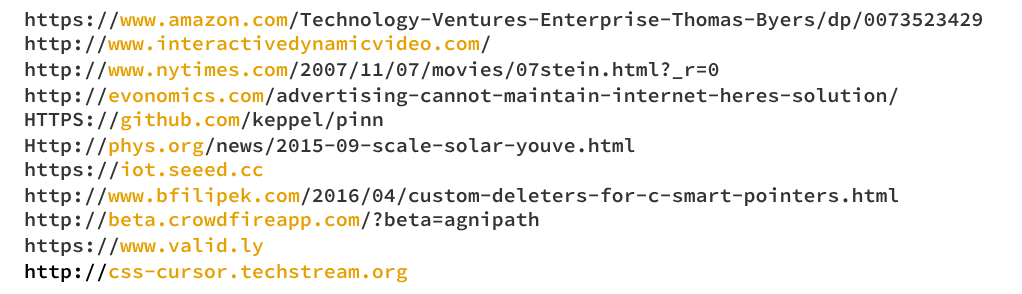

The domain of each **URL** excludes the protocol (e.g. `https://`) and the page path (e.g. `/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429`).

There are several ways that you could use regular expressions to extract the domain, but we suggest the following technique:

* Using a series of characters that will match the protocol.

* Inside a capture group, using a set that will match the character classes used in the domain.

* Because all of the URLs either end with the domain, or continue with page path which starts with / (a character not found in any domains), we don't need to cater for this part of the URL in our regular expression.

## Instructions

1. Write a regular expression to extract the domains from `test_urls` and assign the result to 
`test_urls_clean`

1. Use a regular expression to extract the domains from the url column of the `hn` dataframe. Assign the result to `domains`.

1. Use `Series.value_counts()` to build a frequency table of the domains in domains, limiting the frequency table to just to the top 5. Assign the result to `top_domains`.